# 📊 Prédiction du Délai de Paiement à partir de FEC Fictifs

Projet fictif visant à prédire le **délai de paiement des clients** à partir de données comptables simulées, similaires à des FEC (Fichiers d'Écriture Comptable).

Ce notebook présente toutes les étapes : simulation des données, préparation, modélisation, évaluation et visualisation.

## 🔧 1. Simulation de données FEC fictives

In [3]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime

# Simulation de 1000 écritures comptables
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'EcritureDate': pd.to_datetime('2022-01-01') + pd.to_timedelta(np.random.randint(0, 365, size=n), unit='d'),
    'Montant': np.random.uniform(100, 5000, size=n),
    'Debit': np.random.uniform(0, 2500, size=n),
    'Credit': np.random.uniform(0, 2500, size=n),
    'ClientID': np.random.randint(1000, 1050, size=n)
})

# Générer une date de paiement postérieure à la date d’écriture
df['DatePaiementClient'] = df['EcritureDate'] + pd.to_timedelta(np.random.randint(5, 120, size=n), unit='d')
df['Delai'] = (df['DatePaiementClient'] - df['EcritureDate']).dt.days
df.head()

,EcritureDate,Montant,Debit,Credit,ClientID,DatePaiementClient,Delai
0,2022-04-13,2709.688220,2414.555403,1303.240119,1016,2022-07-08,86
1,2022-12-15,353.935330,1081.244696,2440.034558,1005,2023-02-25,72
2,2022-09-28,1749.360963,779.540333,313.875537,1018,2023-01-23,117
3,2022-04-17,758.631917,1265.354657,42.369162,1037,2022-07-28,102
4,2022-03-13,410.537355,1098.779222,1925.395529,1027,2022-06-18,97


## 🧹 2. Préparation des données

In [25]:

X = df[['Montant', 'Debit', 'Credit']]
y = df['Delai']

## 📊 3. Exploration rapide

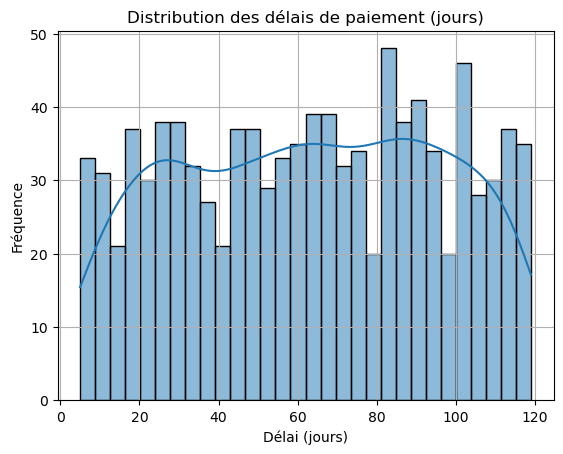

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Delai'], bins=30, kde=True)
plt.title('Distribution des délais de paiement (jours)')
plt.xlabel('Délai (jours)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

## 🤖 4. Entraînement du modèle

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

## 📈 5. Évaluation du modèle

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f} jours")
print(f"RMSE : {rmse:.2f} jours")
print(f"R²   : {r2:.4f}")

MAE : 31.37 jours
RMSE : 36.65 jours
R²   : -0.1914


C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 📉 6. Visualisation des prédictions vs réel

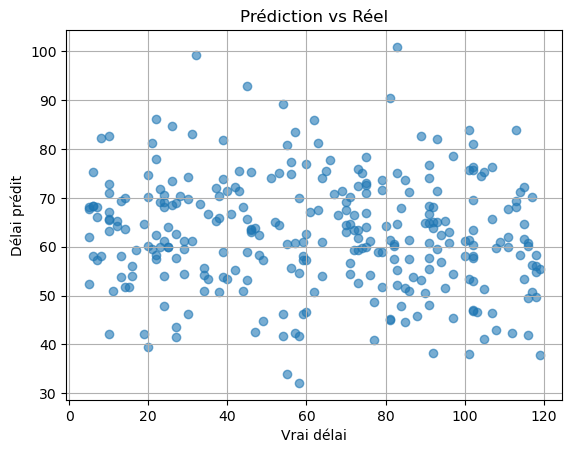

In [13]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Vrai délai')
plt.ylabel('Délai prédit')
plt.title('Prédiction vs Réel')
plt.grid(True)
plt.show()

## 🚀 7. Améliorations futures

- Ajouter des variables sur le profil client (ancienneté, typologie, pays)
- Intégrer la saisonnalité (mois, trimestre)
- Utiliser des techniques NLP sur les libellés
- Passer à des modèles plus complexes : XGBoost, CatBoost, etc.

## ✅ 8. Conclusion
Ce projet simule une approche simple de prédiction du délai de paiement client à partir de données FEC. Idéal pour démontrer la capacité à exploiter des données brutes comptables en vue d'une aide à la décision.